<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_3.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-57.390803,66.889462,-456.398726,523.288188
1,0.0,1.0,81.927655,90.868231,3952.820975,4135.616861,1029.361701,3106.255160
2,0.0,2.0,32.641176,83.287889,1290.537957,1416.467022,765.586450,650.880572
3,0.0,3.0,21.725233,76.302108,-1367.123335,-1259.095994,590.287620,-1849.383614
4,0.0,4.0,76.574784,95.824456,6410.208912,6592.608152,1128.000619,5464.607533
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,1542.030764,1662.702955,613.456497,1049.246457
59996,999.0,56.0,47.180985,50.913854,-681.425791,-573.330951,97.326085,-670.657037
59997,999.0,57.0,60.209910,38.656766,-178.094581,-69.227906,-66.481722,-2.746183
59998,999.0,58.0,39.539485,87.817531,2980.340473,3117.697489,681.261775,2436.435714


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.749686,22.530578,-57.390803,66.889462,-456.398726,523.288188
1,0.0,1.0,81.927655,90.868231,3952.820975,4135.616861,1029.361701,3106.255160
2,0.0,2.0,32.641176,83.287889,1290.537957,1416.467022,765.586450,650.880572
3,0.0,3.0,21.725233,76.302108,-1367.123335,-1259.095994,590.287620,-1849.383614
4,0.0,4.0,76.574784,95.824456,6410.208912,6592.608152,1128.000619,5464.607533
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,24.321734,86.350457,1542.030764,1662.702955,613.456497,1049.246457
59996,999.0,56.0,47.180985,50.913854,-681.425791,-573.330951,97.326085,-670.657037
59997,999.0,57.0,60.209910,38.656766,-178.094581,-69.227906,-66.481722,-2.746183
59998,999.0,58.0,39.539485,87.817531,2980.340473,3117.697489,681.261775,2436.435714


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    91.749686  22.530578   -57.390803    66.889462  -456.398726   
      1.0    81.927655  90.868231  3952.820975  4135.616861  1029.361701   
      2.0    32.641176  83.287889  1290.537957  1416.467022   765.586450   
      3.0    21.725233  76.302108 -1367.123335 -1259.095994   590.287620   
      4.0    76.574784  95.824456  6410.208912  6592.608152  1128.000619   
...                ...        ...          ...          ...          ...   
999.0 55.0   24.321734  86.350457  1542.030764  1662.702955   613.456497   
      56.0   47.180985  50.913854  -681.425791  -573.330951    97.326085   
      57.0   60.209910  38.656766  -178.094581   -69.227906   -66.481722   
      58.0   39.539485  87.817531  2980.340473  3117.697489   681.261775   
      59.0   69.258880  93.136536  3965.728264  4138.123680   853.969903   

                   e_hat  
rep   index               
0.0   0.0     523.288188  
      1.0    3106.255160  
      2.0     650.880572  
      3.0   -1849.383614  
      4.0    5464.607533  
...                  ...  
999.0 55.0   1049.246457  
      56.0   -670.657037  
      57.0     -2.746183  
      58.0   2436.435714  
      59.0   3284.153777  

[60000 rows x 6 columns]

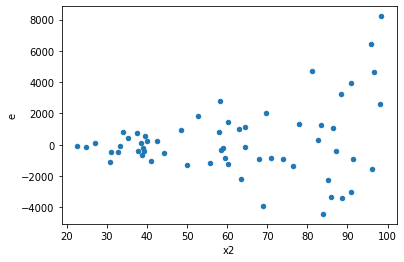

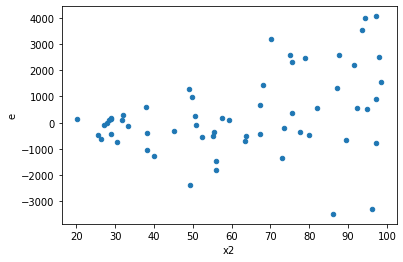

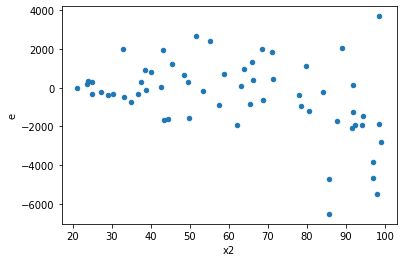

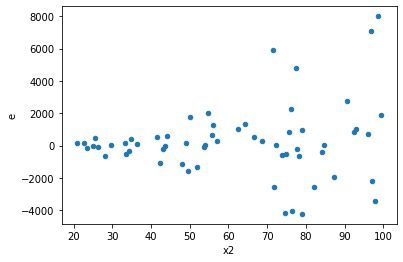

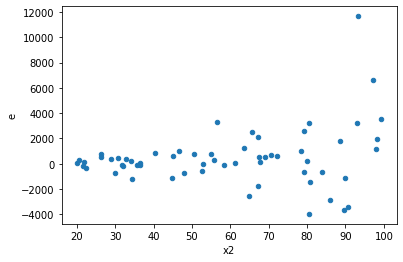

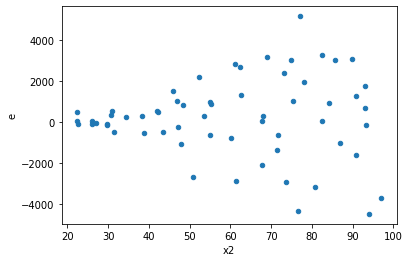

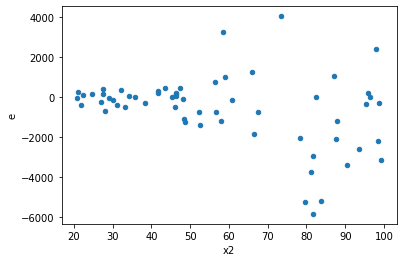

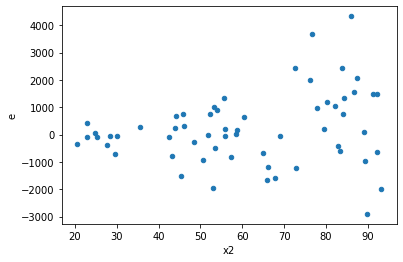

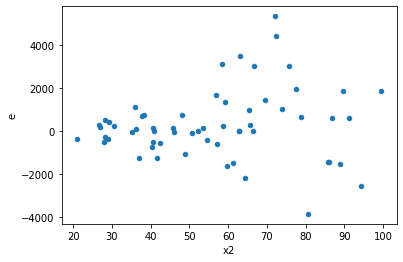

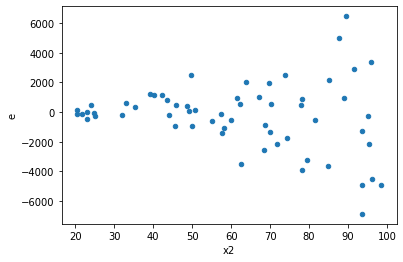

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,29.0,27.0,25297458.472578075,241261909.43953446,872326.1542268301,8935626.275538312,10.24344648184742,3.706122231328379e-08,0.9999999814693888,1.8530611156641896e-08,Reject001=0 : Heteroscedasticity
2.0,30.0,26.0,38657580.35092283,120686782.01414768,1288586.0116974276,4641799.308236449,3.602242509308248,0.001400884278199399,0.9992995578609003,0.0007004421390996995,Reject001=0 : Heteroscedasticity
4.0,36.0,20.0,27658823.654461026,213895076.03572878,768300.6570683619,10694753.80178644,13.92001126563509,6.405704855438898e-08,0.9999999679714757,3.202852427719449e-08,Reject001=0 : Heteroscedasticity
6.0,35.0,21.0,24688899.47461271,133405040.39931798,705397.1278460774,6352620.971396094,9.00573693969205,1.8393639509284299e-06,0.9999990803180245,9.196819754642149e-07,Reject001=0 : Heteroscedasticity
7.0,26.0,30.0,13460844.92632223,80879880.30207074,517724.8048585473,2695996.0100690247,5.207392005885491,2.8441728538775024e-05,0.9999857791357306,1.4220864269387512e-05,Reject001=0 : Heteroscedasticity
10.0,27.0,29.0,40149994.908085085,218270102.1478862,1487036.8484475957,7526555.246478834,5.061445016871131,4.372070173785936e-05,0.9999781396491311,2.186035086892968e-05,Reject001=0 : Heteroscedasticity
11.0,34.0,22.0,93660261.60856907,144807614.8252011,2754713.5767226196,6582164.310236413,2.389418764206857,0.035095185881785174,0.9824524070591074,0.017547592940892587,Reject001=1 : Homoscedasticity
16.0,29.0,27.0,9841881.257168403,124141137.4344411,339375.2157644277,4597819.9049793,13.54789534239533,1.4486125632373614e-09,0.9999999992756937,7.243062816186807e-10,Reject001=0 : Heteroscedasticity
18.0,28.0,28.0,12991040.465018949,258949147.81717378,463965.73089353385,9248183.85061335,19.932902873672646,7.153833081474659e-12,0.9999999999964231,3.5769165407373293e-12,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,29.0,27.0,25297458.472578075,241261909.43953446,872326.1542268301,8935626.275538312,10.24344648184742,3.706122231328379e-08,Reject001=0 : Heteroscedasticity
1.0,28.0,28.0,99190992.2560034,15645788.875264343,3542535.4377144068,558778.1741165837,0.15773396877494594,5.239653984253179e-06,Reject001=0 : Heteroscedasticity
2.0,30.0,26.0,38657580.35092283,120686782.01414768,1288586.0116974276,4641799.308236449,3.602242509308248,0.001400884278199399,Reject001=0 : Heteroscedasticity
3.0,29.0,27.0,257368876.11808813,24710267.7139116,8874788.83165821,915195.1005152444,0.10312302837567851,3.404253516920478e-08,Reject001=0 : Heteroscedasticity
4.0,36.0,20.0,27658823.654461026,213895076.03572878,768300.6570683619,10694753.80178644,13.92001126563509,6.405704855438898e-08,Reject001=0 : Heteroscedasticity
5.0,26.0,30.0,106105009.43019763,107429929.43136692,4080961.901161447,3580997.6477122307,0.8774886250942637,0.7398099529250997,Reject001=1 : Homoscedasticity
6.0,35.0,21.0,24688899.47461271,133405040.39931798,705397.1278460774,6352620.971396094,9.00573693969205,1.8393639509284299e-06,Reject001=0 : Heteroscedasticity
7.0,26.0,30.0,13460844.92632223,80879880.30207074,517724.8048585473,2695996.0100690247,5.207392005885491,2.8441728538775024e-05,Reject001=0 : Heteroscedasticity
8.0,27.0,29.0,88466070.17128667,45188347.12569885,3276521.117455062,1558218.8664034086,0.4755711349157144,0.055689527977164574,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    616
Reject001=1 : Homoscedasticity      384
Name: Result_test, dtype: int64